# Heart Disease Prediction Classification on the Cleveland Dataset
**Owen Kwong, Arissa Tejani, Miaomiao Zhu, and Emily Kehler (Group 18)** 

## Introduction

**Research Question:**  *How accurately can we predict the likelihood of heart disease based on given health factors?*

Following the rise of comfortable and perhaps unhealthy lifestyles, heart disease became the most common cause of death by the mid 20th century in the US (Dalen et al., 2014). The phrase "heart disease" refers to various different conditions relating to the heart. Symptoms can range from chest pain and shortness of breath to more extreme symptoms, such as heart attack and failure. A wide range of factors can impact the likelihood of having heart disease; further, doctors may find it useful to posess a model that could predict if an individual has heart disease.

The project goal is to determine the accuracy of predicting heart disease based on certain factors using K-nearest-neighbours (KNN) classification. We will use the Cleveland database, extracted from the UCI Machine Learning Repository's [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), to provide data on such factors including age, maximum heart rate, etc. The database was extracted from the work of Dr. Robert Detrano with V.A. Medical Center.

## Methods and Results

### 1. Exploratory Data Analysis

Firstly, libraries were loaded to gain a wider set of tools, a seed was set to make the notebook reproducable, and the size of the tables in the notebook were optimized. 

In [1]:
#load packages 
library(tidyverse)
library(repr)
library(cowplot)
library(tidymodels)

#set seed
set.seed(1234)

#number rows for table
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, the untidy data was read directly from a URL and assigned to a variable.

In [2]:
#import through link
link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
untidy_cleveland <- read_csv(link, col_names = FALSE)
untidy_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Table 1. Untidy tibble of Cleveland heart disease data

Next, we cleaned the data through the multiple steps below: 

In [3]:
#renaming the column names
colnames(untidy_cleveland) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

tidy_cleveland = untidy_cleveland |> 
 filter(ca != "?", thal != "?") |>   #in ca and thal there were "?" values
 mutate(age = as.integer(age)) |> #age cannot be decimals
 mutate(ca = as.factor (ca), num = as.factor(num), sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal))   #categorical data not <dbl>

tidy_cleveland

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Table 2. Tidy tibble of Cleveland heart disease data

---

**Attribute Information** 

The column names are given by the data set description on the UCI Machine Learning Repository page

**age:** age in years

**sex:** sex (1 = male, 0 = female)

**cp:** chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

**trestbps:** resting blood pressure (in mmHg)

**chol:** serum cholestoral (in mg/dl)

**fbs:** fasting blood sugar > 120 mg/dl (1 = true,  0 = false)

**restecg:** resting electrocardiographic results (0 = normal, 1 = stt abnormality, 2 = lv hypertrophy)

**thalach:** maximum heart rate achieved

**excang:** exercise induced angina (1 = yes, 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

**ca:** number of major vessels (0-3) colored by flourosopy

**thal:** 3 = normal, 6 = fixed defect, 7 = reversable defect

**num:** diagnosis of heart disease (1 >= heart disease exists, 0 = no risk of heart disease)

---

Label num appears to be binary because the value of 0 means heart disease is not present and a value greater than 0 means that heart disease is present. We chose to simplify the label. 

In [4]:
new_cleveland <- tidy_cleveland |> 
#if num >= 1, change to "Y" else "N" ("Y" = disease present, "N" = no disease)
 mutate(disease = ifelse(num == 1 | num == 2 | num == 3 | num == 4, "Y", "N")) |> 
 mutate(disease = as.factor(disease)) |>
 select(-num)

The data will be split into a training set and testing set and only the training set will be used to construct the classifier. The classifier accuracy can be determined when it predicts the testing set labels. 

In [5]:
#stratifying disease such that sufficient proportions of 1 and 0 in each set
cleveland_split <- initial_split(new_cleveland, prop = 0.75, strata = disease) #training group has 75% data, testing has 25% data

disease_training <- training(cleveland_split)

disease_testing <- testing(cleveland_split)

disease_training #tibble is 222 x 14, 297 * 0.75 = 222.75 so successfully split

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,N
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,N
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,N
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,Y
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,Y
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Y
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Y


Table 3. Training set with 75% of the total data

One useful summary of the dataset would be a table that displays the proportion of the training set that has heart disease. This overall gives more information about the distribution and also makes sure that a sufficient amount of people have and do not have heart disease for our analysis.

In [6]:
#finding proportion of disease

disease_proportions <- disease_training |>
 group_by(disease) |>
 summarize(n = n()) |>
 mutate(precent = 100*n/nrow(disease_training))

disease_proportions

disease,n,precent
<fct>,<int>,<dbl>
N,120,54.05405
Y,102,45.94595


Table 4. Table displaying that heart disease is present ~46% training data patients

Finally, it would be helpful to have visualizations that aid in identifying what predictors may be useful in predicting heart disease in patients. To do this, bar graphs and scatterplots can be created. These are effective visualizations that overall provide information that helps gain a better understanding of the predictors. 

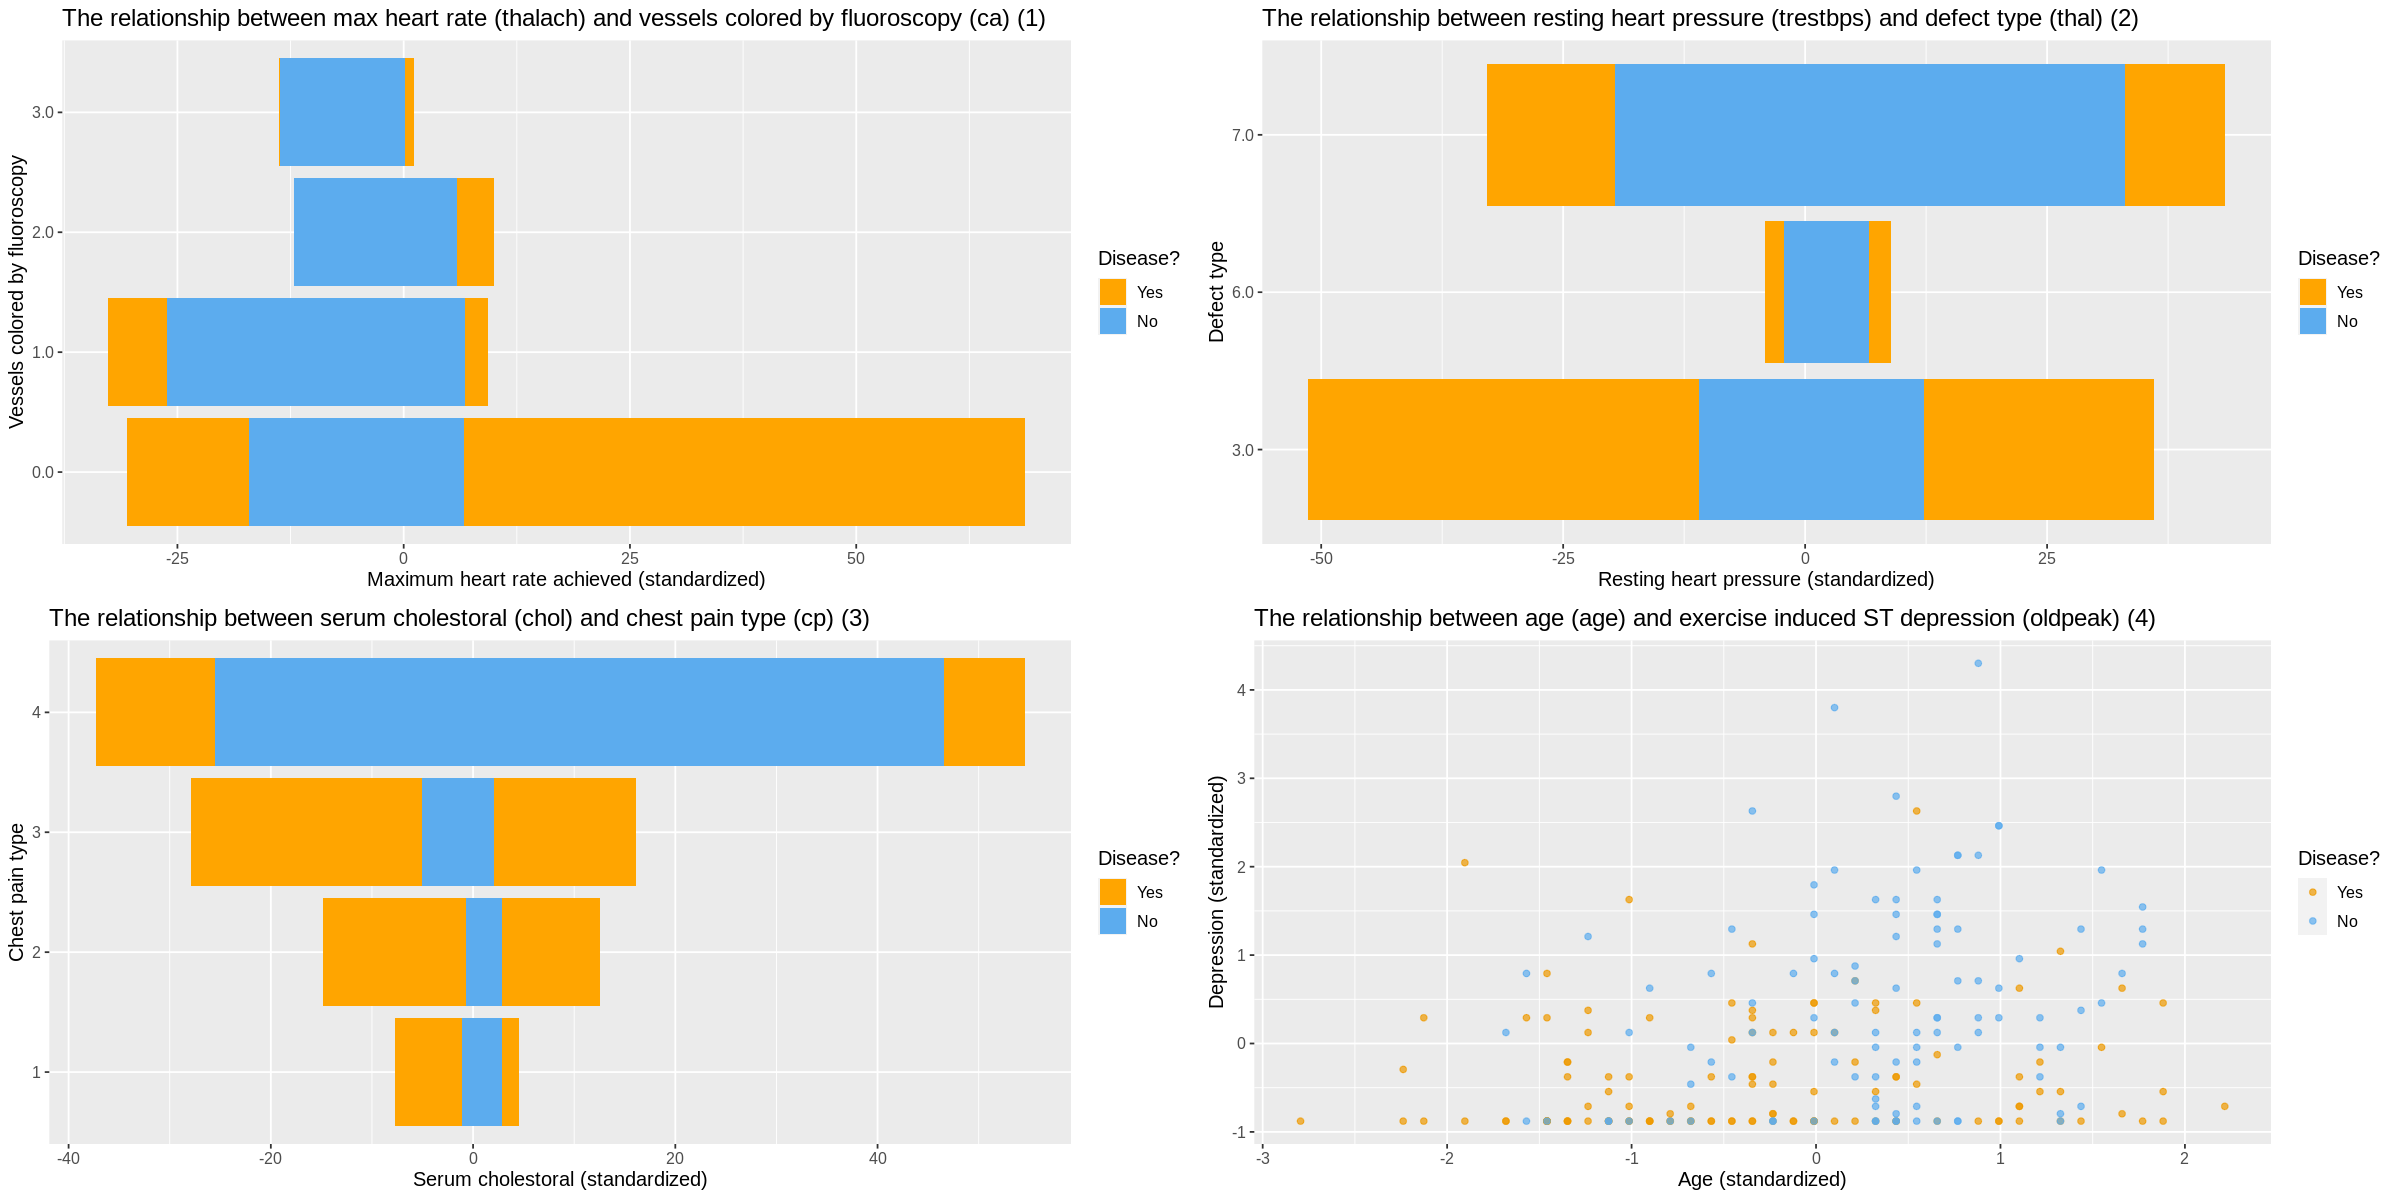

In [7]:
#first standardize <dbl> <int> data
standardize <- recipe(disease ~., data = disease_training) |> 
 step_scale(age, trestbps, chol, thalach, oldpeak) |> 
 step_center(age, trestbps, chol, thalach, oldpeak) |> 
 prep() 

disease_training_standard <- bake(standardize, disease_training)

#then plot different predictors 
options(repr.plot.height = 10, repr.plot.width = 20)

thalach_ca <- disease_training_standard |> 
 ggplot(aes(x = thalach, y = ca, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Maximum heart rate achieved (standardized)", y = "Vessels colored by fluoroscopy", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
 ggtitle("The relationship between max heart rate (thalach) and vessels colored by fluoroscopy (ca) (1)") +
 theme(text = element_text(size = 12))

trestbps_thal <- disease_training_standard |> 
 ggplot(aes(x = trestbps, y = thal, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Resting heart pressure (standardized)", y = "Defect type", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
 ggtitle("The relationship between resting heart pressure (trestbps) and defect type (thal) (2)") +
 theme(text = element_text(size = 12))

chol_cp <- disease_training_standard |> 
 ggplot(aes(x = chol, y = cp, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Serum cholestoral (standardized)", y = "Chest pain type", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
  ggtitle("The relationship between serum cholestoral (chol) and chest pain type (cp) (3)") +
 theme(text = element_text(size = 12))

oldpeak_age <- disease_training_standard |> 
 ggplot(aes(x = age, y = oldpeak, color = disease)) +
 geom_point(alpha = 0.7) + 
 labs(x = "Age (standardized)", y = "Depression (standardized)", color = "Disease?") + 
 scale_color_manual(labels = c("Yes", "No"), values = c("orange2", "steelblue2")) + 
  ggtitle("The relationship between age (age) and exercise induced ST depression (oldpeak) (4)") +
 theme(text = element_text(size = 12))

#create the plots 
grid_plot <- plot_grid(thalach_ca, trestbps_thal, chol_cp, oldpeak_age, ncol = 2)

grid_plot

Graph 1. Graphed relationship between max heart rate achieved and vessels colored by fluoroscopy <br>
Graph 2. Graphed relationship between resting heart pressure and defect type <br>
Graph 3. Graphed relationship between serum cholestoral and chest pain type <br>
Graph 4. Graphed relationship between age and exercise induced ST depression 

### 2. Choosing Predictors

For the overall analysis and model, our group decided to use the four predictors from the dataset: <br> Number of major vessels coloured by fluoroscopy (ca), chest pain type (cp), defect type (thal), and age (age). 

**There are a few reasons for choosing each these predictors.**

**1. Number of major vessels coloured by fluoroscopy (ca)** <br> 
A 2015 article written by Hamid Reza Marateb, a researcher in a Biomedical Engineering department, proposed the idea that vessels coloured by fluoroscopy could be a noninvasive way of diagnosing cornary heart diseases (Marateb & Goudarzi, 2015). Futhermore, it is evident that in Graph 1., the proportion of patients with heart disease who have zero vessels coloured by fluoroscopy is much higher than those who have vessels coloured by fluoroscopy greater than zero. This juxtaposition suggests that number of major vessels coloured by fluoroscopy may impact risk of heart disease.

**2. Chest pain type (cp)** <br>
There were a couple reasons chest pain type was chosen as a predictor for our analysis. Firstly, the Centers for Disease Controls and Prevention explained that anginas (chest pain or discomfort when the heart is not getting enough blood) are often a symptom for heart disease (CDC, 2022). They highlight that the different types of anginas have varying levels of danger (CDC, 2022). In addition, when examining Graph 3. it is evident that for chest pain types three, two, and one, the proportions of patients with heart disease are much larger than for type four. This suggests that chest pain type may impact likelihood of having heart disease.

**3. Defect type (thal)** <br>
The Centers for Disease Controls and Prevention state that individuals who have pre-existing heart defects can develop more problems over time depending on the severity (CDC, 2022). Furthermore, Graph 2. shows that the proportion of patients with heart defect three that have heart disease is greater than that of the other defects. These two pieces of evidence support the argument that defects can play a role in how healthy an individual's heart is. 

**4. Age (age)** <br> 
Choosing age as a predictor is extremely understandable. There are numerous academic and governmental sources that claim increases in the risk of heart disease come with an increase in age (Rodgers et al., 2019). This is often seen in the elderly population (Rodgers et al., 2019). Due to extensive previous research, it can be inferred that age may play a role in heart disease risk. 

### 3. Methods of Analysis

Firstly, tuning our model requires us to use cross-validation. Cross-validation only uses each value once and gets an average for each K value. This must be done because the testing data cannot be used for modelling. 

In [17]:
set.seed(1234)

# cross-validation
cleveland_vfold <- vfold_cv(disease_training, v = 5, strata = disease) # splits into 5 folds to compare and validate against other subsets

Next, we have to tune our classifier so the optimal accuracy can be reached. In the next cell, a tuning model specification is created. This is piplined into other parts of the specification that signify that this is a KNN classification analysis.

In [18]:
# rectangular means each point has one vote, tune tells model we are going to tune to try to get best K value
tuning_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

We create a recipe so that the predictor age can be scaled easily without having to prep and bake. Age is the only quantitative variable in this setting. 

In [10]:
# recipe for scaling and centering 
cleveland_recipe <- recipe(disease ~ ca + cp + thal + age, data = disease_training) |> 
                     step_scale(age) |> 
                     step_center(age)

In the next section, we create a tibble for values of K from 1 to 40. After, we combine all of the aforementioned components into a workflow to perform cross-validation to test K values. 

In [19]:
# create a grid vals for k
grid_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 2))

# workflow for results
cleveland_results <- workflow() |> 
                      add_recipe(cleveland_recipe) |>
                      add_model(tuning_spec) |> 
                      tune_grid(resamples = cleveland_vfold, grid = grid_vals) |> 
                      collect_metrics() |> # collects the metrics 
                      filter(.metric == "accuracy") # filters for the metric of accuracy

To choose the K value that gives us the optimal accuracy, we can plot the relationship between accuracy and K on a line plot. By doing this, the best option can be easily visualized and chosen to be used for the next steps. We can also numerically attempt to determine the best K value.

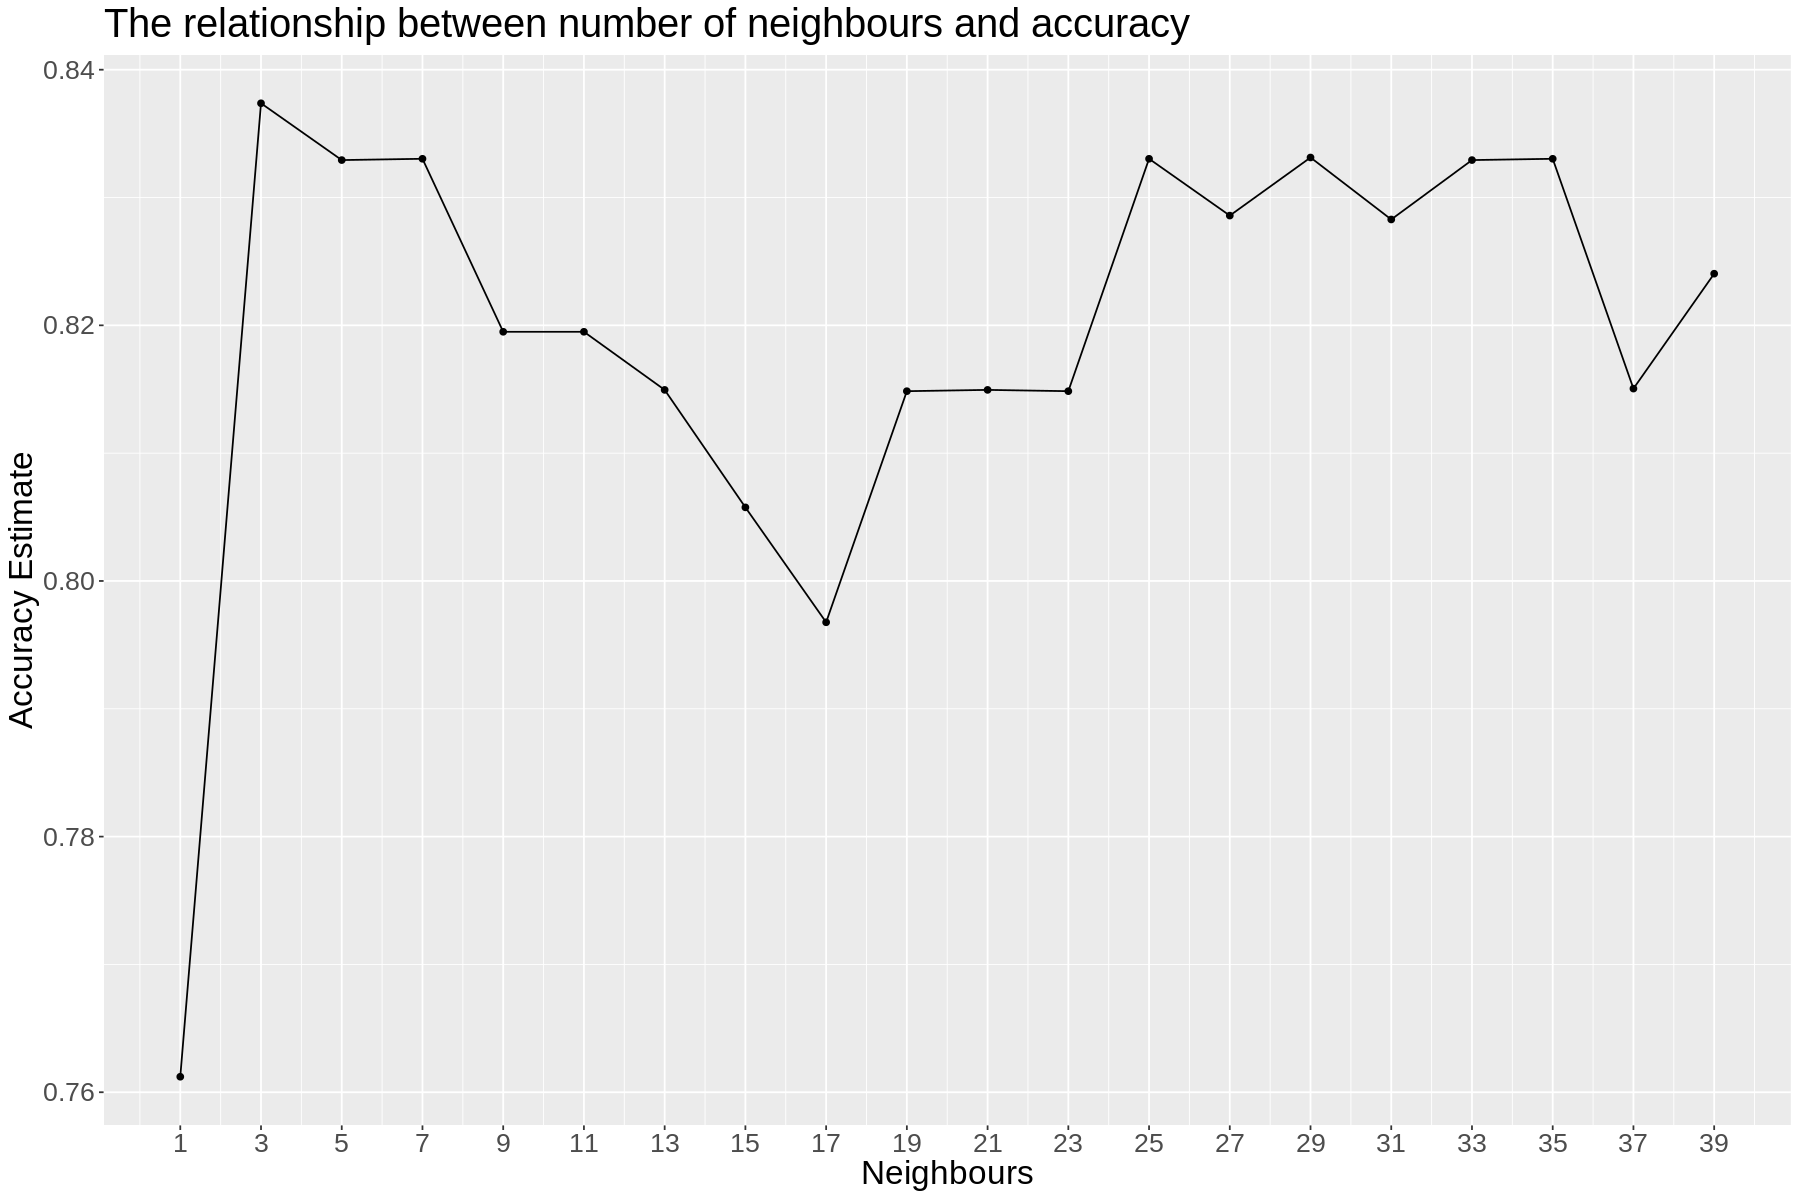

In [12]:
# plot k against accuracy to choose 
options(repr.plot.length = 10, repr.plot.width = 15)

k_val_plot <- ggplot(cleveland_results, aes(x = neighbors, y = mean)) +
               geom_point() + 
               geom_line() + 
               scale_x_continuous(breaks = seq(from = 1, to = 40, by = 2)) + 
               labs(x = "Neighbours", y = "Accuracy Estimate") + 
               ggtitle("The relationship between number of neighbours and accuracy") + 
               theme(text = element_text(size = 20))

k_val_plot

Graph 5. Relationship between number of neighbours and accuracy

In [13]:
# Numerical approach 
numerical_accuracy <- cleveland_results |> 
                        arrange(desc(mean)) |> 
                        select(neighbors, .metric, mean)

head(numerical_accuracy, 2)

neighbors,.metric,mean
<dbl>,<chr>,<dbl>
3,accuracy,0.8373737
29,accuracy,0.8331313


Table 5. The two K values of highest accuracy

**Choosing the optimal K value** 

By examining both the numerical accuracies and the visualization, it is evident that the two K values with highest accuracy are 3 and 29. Since the accuracies are quite similar, we chose to opt for the K value of 29 for the rest of our analysis. The textbook [Data Science: A First Introduction](https://datasciencebook.ca/) explains that other than a high accuracy, an optimal K value shouldn't have a large cost and changing it by one should not greatly affect the accuracy.

The visualization above gives context to the K values. A K value of 3 is evidently unreliable because by lowering it by one, enormous amounts of accuracy is lost. Therefore, a K value of 29 would be most optimal. 

With our newly determined K value, we then create a specification with neighbours being equal to 29 and place this into a new workflow. Our model is now trained with an effective number of neighbours. 

In [14]:
# do a best spec and put into workflow
cleveland_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 29) |> 
                   set_engine("kknn") |> 
                   set_mode("classification")

cleveland_fit <- workflow() |> 
                  add_recipe(cleveland_recipe) |> 
                  add_model(cleveland_spec) |> 
                  fit(data = disease_training) 

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(29,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1846847
Best kernel: rectangular
Best k: 29

Finally, to compute our prediction, we use the predict function, passing in our model and the testing data. By binding this new predicted column and comparing it to the true values, we receive our accuracy. 

In [15]:
# compute prediction 
cleveland_prediction <- predict(cleveland_fit, disease_testing) |> 
                         bind_cols(disease_testing) |> 
                         metrics(truth = disease, estimate = .pred_class) |> 
                         filter(.metric == "accuracy") 
                        
cleveland_prediction 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7733333


Table 6. Accuracy when predicting training data

As a bonus, results can be displayed using a confusion matrix

**Confusion Matrix**
- True Positive (prediction is yes, and they do have the disease.
- True Negative (prediction is no, and they don't have the disease.)
- False Positive (We predicted yes, but they don't actually have the
disease. (Also known as a "Type I error.")
- False Negative (We predicted no, but they actually do have the
disease. (Also known as a "Type II error.")

|                  |          |  Actual Values |                |
|:----------------:|----------|:--------------:|:--------------:|
|                  |          |   Heart Disease   |    Heart Disease   |
|**Predicted Value**  | Heart Disease |  True Positive | False Positive|
|                  | No Heart Disease | False Negative | True Negative  |

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



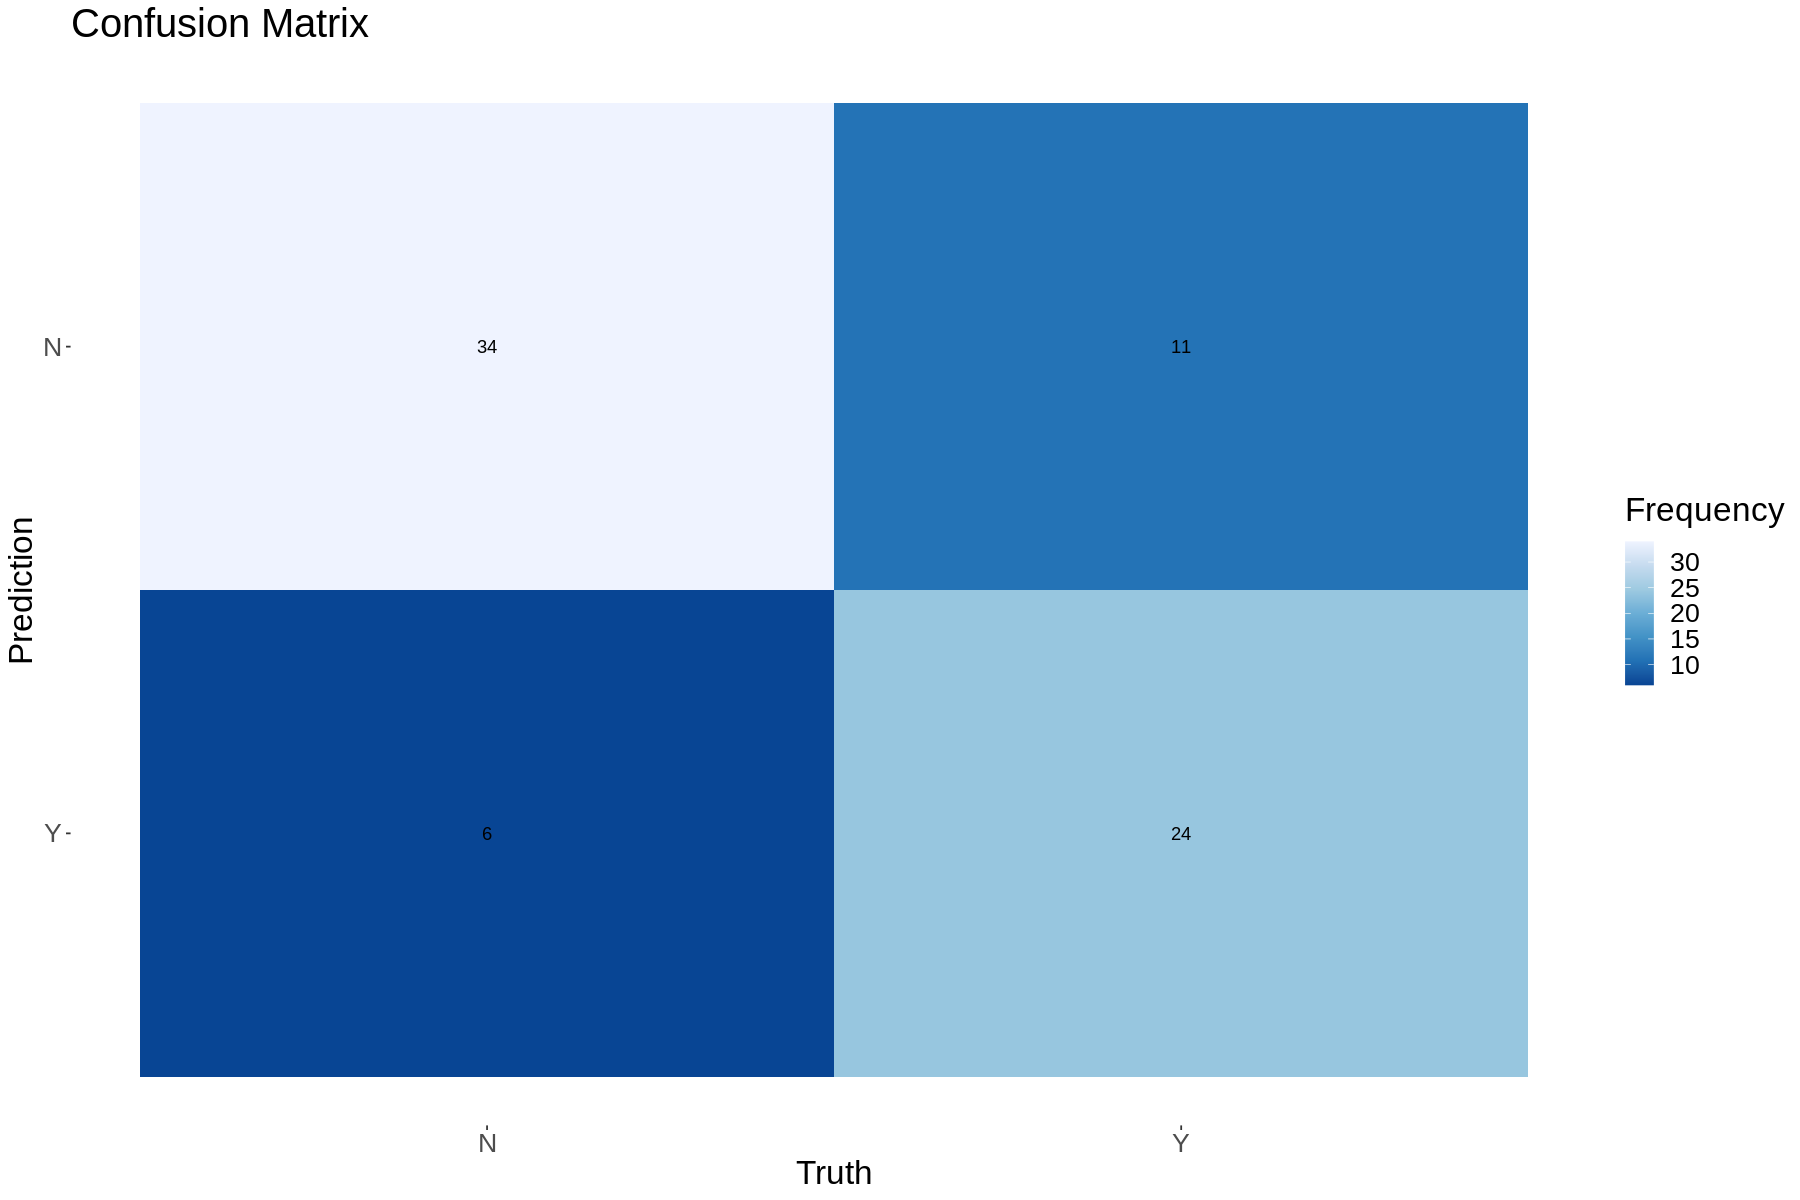

In [16]:
# using previous cleveland best fit 
cf_predictions <- predict(cleveland_fit, disease_testing) |> 
    bind_cols(disease_testing)

cf_acc <- cf_predictions |> 
    metrics(truth = disease, estimate = .pred_class) |> 
    select(.metric, .estimate)  |> 
    head(1)

cleveland_cm <- cf_predictions |>
    conf_mat(truth = disease, estimate = .pred_class)

autoplot(cleveland_cm, type = "heatmap") +
    scale_fill_distiller(palette = "Blues", name = "Frequency") + 
    labs(title = "Confusion Matrix") +
    theme(legend.position = "right", text = element_text(size = 20),
          plot.caption = element_text(size = 10, hjust = 0))

Figure 1. Confusion matrix for K = 29 neighbours

- To visualize the results, we also created a confusion matrix as shown in Figure 1. 
- It can be noted that a total of 58 out of 75 were true and there were only a few cases of a false negative where we predict that the patient does not have heart disease but they do and 11 cases of a false positive

## Discussion

During the analysis process, understanding of the dataset was developed: 
1. ca, cp, thal, and age were indicated to be promising predictors. This discovery was due to both preliminary visualizations and scholarly sources from the web. 
2. After cross-validation with these specific predictors in mind, a K value of 29 was found to be the optimal K value in terms of accuracy, reliability, and cost. 
3. Finally, the model we created with the optimal K value predicted the testing dataset with an accuracy of approximately 77% 

It was interesting that only four unrelated predictors were able to predict with a solid accuracy of 77%. With the preliminary research that was done, these results were expected. On one hand, the model predicted much better than the majority classifier which was shown to be approximately 54% in the preliminary analysis.  An accuracy of 77% is not very noteworthy which reflects the general ideas of scholarly sources. No scholarly sources suggested that this model would be groundbreaking.

These findings are unlikely to impact the medical community when it comes to diagnosing patients with heart disease. Since this is a very delicate topic, a model with only 77% accuracy is problematic. If a patient were to be wrongly diagnosed by the model as healthy and without disease, it could result in life altering complications. If the accuracy of this model were to be slightly improved, perhaps doctors could use a similar system as a way of gathering information about a patient. An accuracy of 77% is likely because the model is made only by looking at numbers and there could be confounding variables. This suggests that it is imperative doctors still meet in-person with patients. 

Our group believes that findings like these may be able to increase interest in using classification models to diagnose patients. If, through extensive research and development, computer models were able to diagnose heart disease patients with high accuracy without the help of doctors, this would allow some of the responsibilities of doctors to be alleviated. Overall, we hope that this type of work allows heart disease patients to have a higher chance of accurate diagnosis and effective treatment. 

## References

Campbell, T., &amp; Timbers, T. (2022, September 24). Data science. Data Science. Retrieved November 30, 2022, from https://datasciencebook.ca/ 

CDC. (2022, January 20). Other conditions related to heart disease. Centers for Disease Control and Prevention. Retrieved November 29, 2022, from https://www.cdc.gov/heartdisease/other_conditions.htm#:~:text=and%20unstable%20angina.-,Angina%2C%20a%20symptom%20of%20coronary%20artery%20disease%2C%20is%20chest%20pain,It%20may%20feel%20like%20indigestion. 

CDC. (2022, January 24). What are congenital heart defects? Centers for Disease Control and Prevention. Retrieved November 29, 2022, from https://www.cdc.gov/ncbddd/heartdefects/facts.html 

Dalen, J. E., Alpert, J. S., Goldberg, R. J., &amp; Weinstein, R. S. (2014). The epidemic of the 20th century: Coronary heart disease. The American Journal of Medicine, 127(9), 807–812. https://doi.org/10.1016/j.amjmed.2014.04.015 

Detrano, R. (1990). *Cleveland* [Data set]. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.     
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

Marateb, H. R., &amp; Goudarzi, S. (2015, March). A noninvasive method for coronary artery diseases diagnosis using a clinically-interpretable fuzzy rule-based system. Journal of research in medical sciences : the official journal of Isfahan University of Medical Sciences. Retrieved November 29, 2022, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/ 

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., &amp; Panguluri, S. K. (2019). Cardiovascular risks associated with gender and aging. Journal of Cardiovascular Development and Disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019 